In [ ]:
#Prof. Marcelino Andrade
#mrclnndrd@gmail.com
import sys
!{sys.executable} -m pip install pwlf

In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import requests
from tqdm import tqdm 
from os import listdir
from os.path import isfile, join
import datetime as dt
import geopandas as gpd
import json
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
import pwlf
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

/home/mrclnndrd/anaconda3/envs/pyfinance/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#https://covid.saude.gov.br/

input_dir='/mnt/d/Dropbox/Finance/2_Machine_Learning/6_Data/P012_COVID_19/'
meta_data_file = ("%s/COVID19_BR.csv" % input_dir)
meta_data_df = pd.read_csv(meta_data_file,sep=';')
meta_data_df.tail()

,region,sigla,date,cases_inc,cases,deaths_inc,deaths
2344,Centro-Oeste,DF,2020-04-21,9,881,0,24
2345,Centro-Oeste,DF,2020-04-22,65,946,1,25
2346,Centro-Oeste,DF,2020-04-23,17,963,0,25
2347,Centro-Oeste,DF,2020-04-24,26,989,1,26
2348,Centro-Oeste,DF,2020-04-25,24,1013,0,26


In [3]:
df=meta_data_df.copy()
plt.figure(figsize=(5,5))
state=list(set(df['sigla']))
output=None
for ste in state:
    if output is None:
        dfx=df[df['sigla']==ste][['date','cases']].set_index('date')
        dfx.columns=[ste]
        output=dfx
    else:
        dfx=df[df['sigla']==ste][['date','cases']].set_index('date')
        dfx.columns=[ste]
        output=pd.concat([output,dfx],axis=1)
output['BR']=output.sum(axis=1)
output=output[output.columns.sort_values()]
output.tail()

,AC,AL,AM,AP,BA,BR,CE,DF,ES,GO,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,
2020-04-21,195,210,2270,457,1489,43079,3716,881,1212,421,...,1024,5306,608,199,247,904,1063,92,15385,37
2020-04-22,214,243,2479,479,1644,45757,3910,946,1313,438,...,1063,5552,646,223,280,923,1091,117,15914,37
2020-04-23,227,324,2888,548,1789,49492,4598,963,1363,453,...,1082,6172,708,250,297,994,1115,124,16740,37
2020-04-24,234,413,3194,633,1962,52995,4800,989,1381,486,...,1119,6282,754,290,304,1061,1170,144,17826,43
2020-04-25,258,501,3635,685,2081,58509,5421,1013,1595,506,...,1140,6828,781,328,345,1096,1209,153,20004,50


<Figure size 360x360 with 0 Axes>

In [4]:
input_dir='/mnt/d/Dropbox/Finance/2_Machine_Learning/6_Data/P012_COVID_19/'
meta_data_file = ("%s/population_br.csv" % input_dir)
pop = pd.read_csv(meta_data_file)
pop.tail()
pop=pop.sort_values(by='uf')['uf_population'].values
pop

array([   881935,   3337357,   4144597,    845731,  14873064, 210147125,
         9132078,   3015268,   4018650,   7018354,   7075181,  21168791,
         2778986,   3484466,   8602865,   4018127,   9557071,   3273227,
        11433957,  17264943,   3506853,   1777225,    605761,  11377239,
         7164788,   2298696,  45919049,   1572866])

In [5]:
output_pop=1000000*output/pop
output_pop.tail()

,AC,AL,AM,AP,BA,BR,CE,DF,ES,GO,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,
2020-04-21,221.104730,62.924044,547.701019,540.360942,100.113870,204.994477,406.917243,292.179667,301.593819,59.985575,...,89.557797,307.327977,173.374818,111.972316,407.751572,79.456888,148.364474,40.022691,335.046137,23.523937
2020-04-22,242.648268,72.812109,598.128117,566.373942,110.535395,217.737930,428.161038,313.736623,326.726637,62.407795,...,92.968690,321.576503,184.210744,125.476515,462.228503,81.126889,152.272475,50.898422,346.566411,23.523937
2020-04-23,257.388583,97.082811,696.810812,647.960167,120.284563,235.511192,503.499861,319.374596,339.168626,64.545049,...,94.630407,357.487424,201.890413,140.668739,490.292376,87.367418,155.622190,53.943627,364.554588,23.523937
2020-04-24,265.325676,123.750621,770.641874,748.464937,131.916329,252.180466,525.619689,327.997379,343.647742,69.247006,...,97.866382,363.858716,215.007587,163.175737,501.848089,93.256369,163.298621,62.644212,388.204904,27.338629
2020-04-25,292.538566,150.118792,877.045464,809.950209,139.917370,278.419227,593.621736,335.956870,396.899456,72.096677,...,99.703016,395.483495,222.706797,184.557386,569.531548,96.332687,168.741908,66.559475,435.636200,31.789103


In [6]:
cols=output_pop.iloc[-1].sort_values(ascending=False).keys()
cols

Index(['AM', 'AP', 'CE', 'RR', 'PE', 'SP', 'ES', 'RJ', 'DF', 'MA', 'AC', 'BR',
       'RN', 'RO', 'PA', 'SC', 'AL', 'BA', 'PB', 'PR', 'RS', 'PI', 'MS', 'GO',
       'MT', 'MG', 'SE', 'TO'],
      dtype='object')

In [7]:
#cols=output.columns
xy=[]
for col in cols:
    y=output[col].iloc[np.where(output[col]>0)].values
    x=np.array(range(1,len(y)+1))
    xy.append([x,y])

In [8]:
#cols=output.columns
xy=[]
for col in cols:
    y=output_pop[col].iloc[np.where(output_pop[col]>0)].values
    x=np.array(range(1,len(y)+1))
    xy.append([x,y])

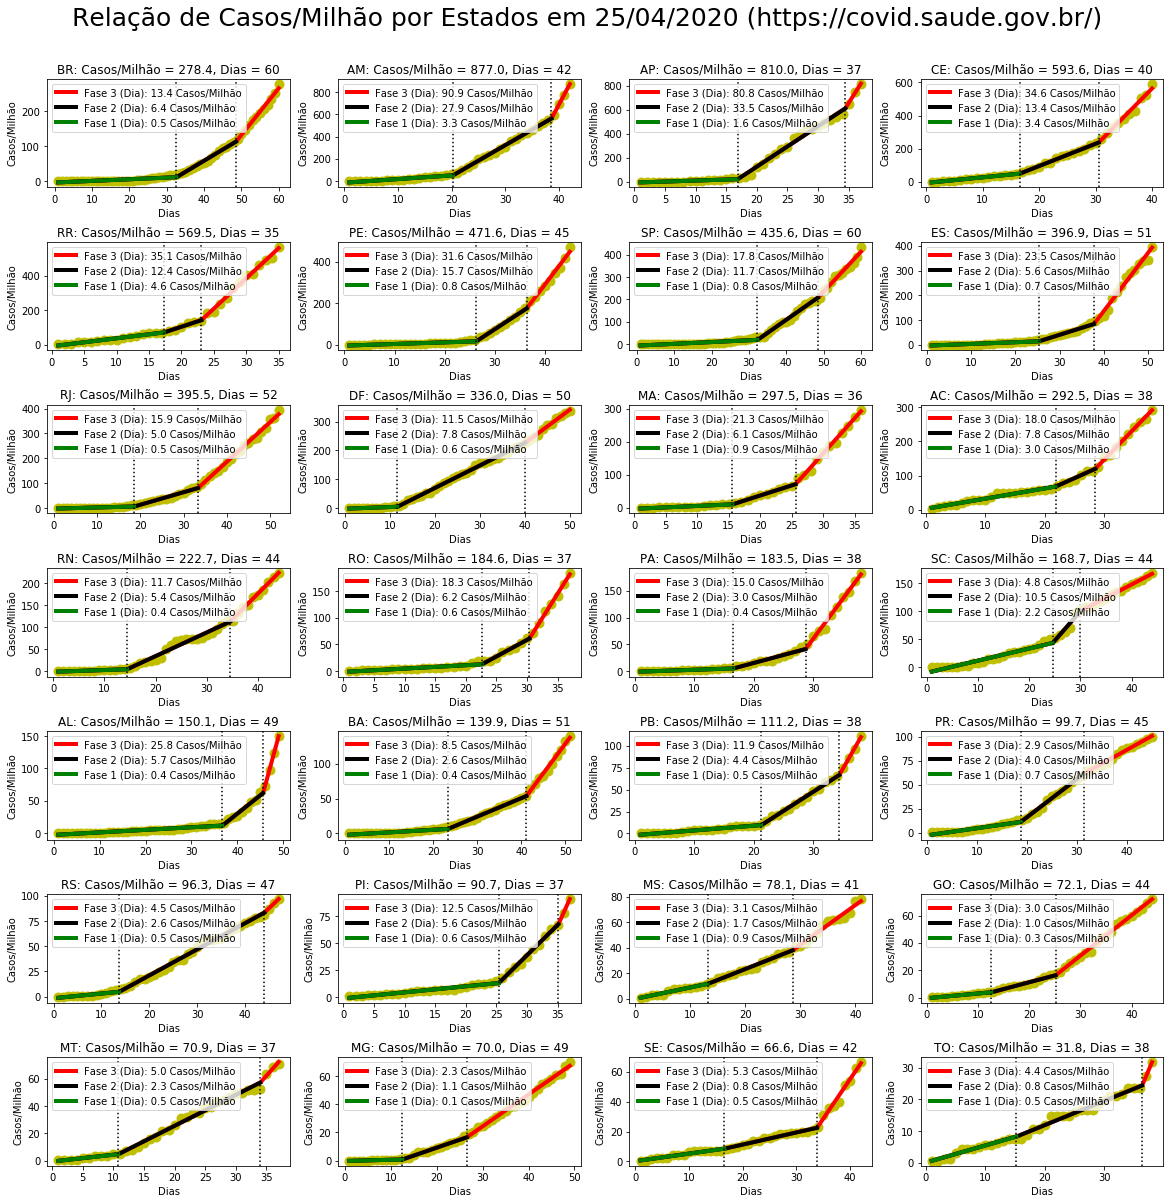

In [9]:
dt=output_pop.index[-1].split("-")[2]+'/'+output_pop.index[-1].split("-")[1]+'/'+output_pop.index[-1].split("-")[0]
# initialize piecewise linear fit with your x and y data
fig=plt.figure(figsize=(20,20))

fig.suptitle('Relação de Casos/Milhão por Estados em '+ dt+ ' (https://covid.saude.gov.br/)',y=.93,fontsize=25)
fig.subplots_adjust(hspace=0.5)

n=0
for i,col in zip(range(len(cols)),cols):
    
    if col!='BR':
        n+=1
        plt.subplot(7,4,n+1)
    else:
        plt.subplot(7,4,1)

    x = xy[i][0]#/np.max(xyt[i][0])
    y = xy[i][1]#/np.max(xyt[i][1])

    my_pwlf = pwlf.PiecewiseLinFit(x, y)

    # fit the data for four line segments
    res = my_pwlf.fit(3)

    # predict for the determined points
    xHat = np.linspace(min(x), max(x), num=10000)
    yHat = my_pwlf.predict(xHat)

    vt=np.abs(np.diff(np.diff(yHat)))
    vt[vt>0.01*np.max(vt)]=1
    vt[vt<1]=0
    vt=np.diff(vt)
    vt[vt<0]=0
    pos=np.where(vt!=0)[0]

#    print(col,pos,pos[1]-pos[0])
    ang1=round(((yHat[pos[0]]-yHat[0])/(xHat[pos[0]]-xHat[0])),1)#*180/(math.pi),2)#)+ 'o '
    ang2=round(((yHat[pos[1]]-yHat[pos[0]])/(xHat[pos[1]]-xHat[pos[0]])),1)#*180/(math.pi),2)#)+ 'o '
    ang3=round(((yHat[-1]-yHat[pos[1]])/(xHat[-1]-xHat[pos[1]])),1)#*180/(math.pi),2)#)+ 'o '

    d3=str(round(xHat[-1]-xHat[pos[1]],1))
    d2=str(round(xHat[pos[1]]-xHat[pos[0]],1))
    d1=str(round(xHat[pos[0]]-xHat[0],1))

    #plt.plot(x, y, 'yo', linewidth=11)
    plt.scatter(x,y,s=80,color='y')
    plt.plot(xHat, yHat, 'r-',label='Fase 3 (Dia): '+str((ang3))+' Casos/Milhão', linewidth=4)
    plt.plot(xHat[0:pos[1]], yHat[0:pos[1]], 'k-',label='Fase 2 (Dia): '+str((ang2))+' Casos/Milhão', linewidth=4)
    plt.plot(xHat[0:pos[0]], yHat[0:pos[0]], 'g-',label='Fase 1 (Dia): '+str((ang1))+' Casos/Milhão', linewidth=4)
    plt.ylabel("Casos/Milhão")
    plt.xlabel("Dias")

    plt.legend(loc="upper left")


    plt.axvline(x=xHat[pos[0]], color='k',linestyle=":")
    plt.axvline(x=xHat[pos[1]], color='k',linestyle=":")

    plt.title(col+": Casos/Milhão = "+str(round(y[-1],1))+", Dias = "+str(x[-1]))
#plt.tight_layout()

#plt.show()
plt.savefig('covid_casos.png')

In [10]:
#https://covid.saude.gov.br/

input_dir='/mnt/d/Dropbox/Finance/2_Machine_Learning/6_Data/P012_COVID_19/'
meta_data_file = ("%s/COVID19_BR.csv" % input_dir)
meta_data_df = pd.read_csv(meta_data_file,sep=';')
meta_data_df.tail()

,region,sigla,date,cases_inc,cases,deaths_inc,deaths
2344,Centro-Oeste,DF,2020-04-21,9,881,0,24
2345,Centro-Oeste,DF,2020-04-22,65,946,1,25
2346,Centro-Oeste,DF,2020-04-23,17,963,0,25
2347,Centro-Oeste,DF,2020-04-24,26,989,1,26
2348,Centro-Oeste,DF,2020-04-25,24,1013,0,26


In [11]:
df=meta_data_df.copy()
plt.figure(figsize=(5,5))
state=list(set(df['sigla']))
output=None
for ste in state:
    if output is None:
        dfx=df[df['sigla']==ste][['date','deaths']].set_index('date')
        dfx.columns=[ste]
        output=dfx
    else:
        dfx=df[df['sigla']==ste][['date','deaths']].set_index('date')
        dfx.columns=[ste]
        output=pd.concat([output,dfx],axis=1)
output['BR']=output.sum(axis=1)
output=output[output.columns.sort_values()]
output.tail()

,AC,AL,AM,AP,BA,BR,CE,DF,ES,GO,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,
2020-04-21,8,19,193,13,47,2741,215,24,34,19,...,51,461,28,4,3,27,35,5,1093,1
2020-04-22,8,20,207,14,50,2906,233,25,34,21,...,57,490,29,5,3,27,37,7,1134,1
2020-04-23,10,22,234,16,59,3313,266,25,42,23,...,60,530,34,5,3,29,39,8,1345,2
2020-04-24,11,27,255,18,64,3670,284,26,42,24,...,64,570,38,5,3,31,42,8,1512,2
2020-04-25,11,29,287,19,70,4016,310,26,47,25,...,69,615,40,7,3,34,42,9,1667,2


<Figure size 360x360 with 0 Axes>

In [12]:
input_dir='/mnt/d/Dropbox/Finance/2_Machine_Learning/6_Data/P012_COVID_19/'
meta_data_file = ("%s/population_br.csv" % input_dir)
pop = pd.read_csv(meta_data_file)
pop.tail()
pop=pop.sort_values(by='uf')['uf_population'].values
pop

array([   881935,   3337357,   4144597,    845731,  14873064, 210147125,
         9132078,   3015268,   4018650,   7018354,   7075181,  21168791,
         2778986,   3484466,   8602865,   4018127,   9557071,   3273227,
        11433957,  17264943,   3506853,   1777225,    605761,  11377239,
         7164788,   2298696,  45919049,   1572866])

In [13]:
output_pop=1000000*output/pop
output_pop.tail()

,AC,AL,AM,AP,BA,BR,CE,DF,ES,GO,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,
2020-04-21,9.070963,5.693128,46.566651,15.371318,3.160075,13.043243,23.543382,7.959491,8.460553,2.707187,...,4.460398,26.701507,7.984367,2.250700,4.952448,2.373159,4.885001,2.175146,23.802758,0.635782
2020-04-22,9.070963,5.992766,49.944542,16.553727,3.361782,13.828407,25.514456,8.291137,8.460553,2.992155,...,4.985151,28.381212,8.269523,2.813375,4.952448,2.373159,5.164144,3.045205,24.695633,0.635782
2020-04-23,11.338704,6.592043,56.459048,18.918545,3.966903,15.765145,29.128091,8.291137,10.451271,3.277122,...,5.247527,30.698045,9.695302,2.813375,4.952448,2.548949,5.443287,3.480234,29.290676,1.271564
2020-04-24,12.472575,8.090234,61.525885,21.283363,4.303081,17.463955,31.099165,8.622782,10.451271,3.419605,...,5.597362,33.014879,10.835926,2.813375,4.952448,2.724738,5.862002,3.480234,32.927511,1.271564
2020-04-25,12.472575,8.689511,69.246781,22.465772,4.706495,19.110421,33.946272,8.622782,11.695470,3.562089,...,6.034656,35.621317,11.406238,3.938725,4.952448,2.988423,5.862002,3.915263,36.303017,1.271564


In [14]:
cols=output_pop.iloc[-1].sort_values(ascending=False).keys()
cols

Index(['AM', 'PE', 'SP', 'RJ', 'CE', 'AP', 'BR', 'MA', 'AC', 'ES', 'PB', 'RN',
       'PA', 'AL', 'DF', 'PR', 'SC', 'PI', 'RR', 'BA', 'RO', 'SE', 'GO', 'RS',
       'MG', 'MT', 'MS', 'TO'],
      dtype='object')

In [15]:
#cols=output.columns
xy=[]
for col in cols:
    y=output_pop[col].iloc[np.where(output_pop[col]>0)].values
    x=np.array(range(1,len(y)+1))
    xy.append([x,y])

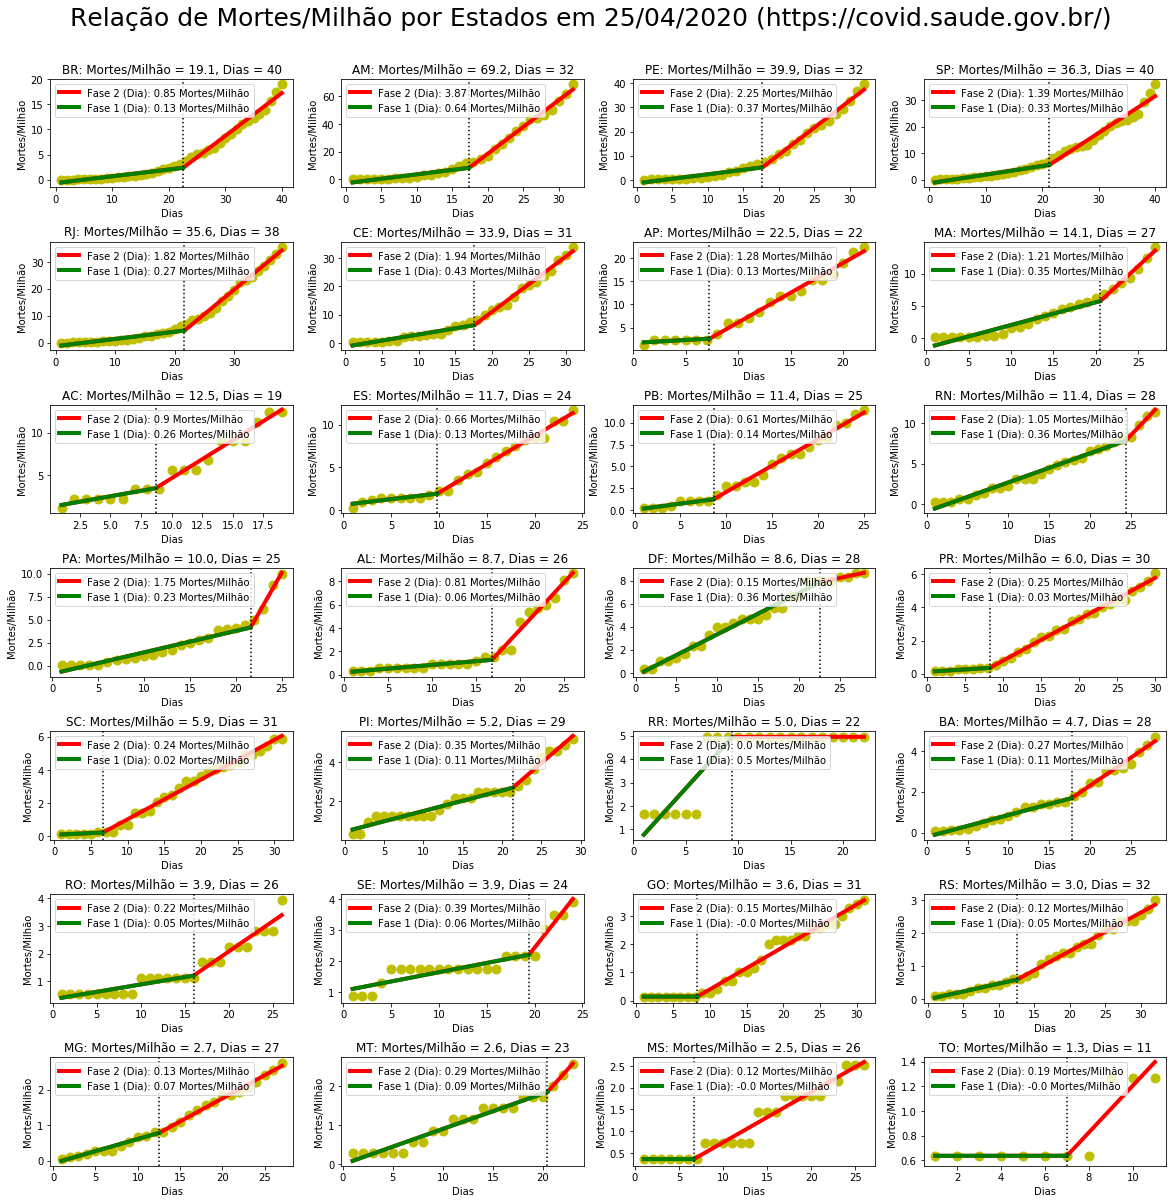

In [18]:
dt=output_pop.index[-1].split("-")[2]+'/'+output_pop.index[-1].split("-")[1]+'/'+output_pop.index[-1].split("-")[0]

# initialize piecewise linear fit with your x and y data
fig=plt.figure(figsize=(20,20))

fig.suptitle('Relação de Mortes/Milhão por Estados em '+ dt+ ' (https://covid.saude.gov.br/)',y=.93,fontsize=25)
fig.subplots_adjust(hspace=0.5)

n=0
for i,col in zip(range(len(cols)),cols):
    
    
    if col!='BR':
        n+=1
        plt.subplot(7,4,n+1)
    else:
        plt.subplot(7,4,1)    
    

    x = xy[i][0]#/np.max(xyt[i][0])
    y = xy[i][1]#/np.max(xyt[i][1])

    my_pwlf = pwlf.PiecewiseLinFit(x, y)

    # fit the data for four line segments
    res = my_pwlf.fit(2)

    # predict for the determined points
    xHat = np.linspace(min(x), max(x), num=10000)
    yHat = my_pwlf.predict(xHat)

    vt=np.abs(np.diff(np.diff(yHat)))
    vt[vt>0.01*np.max(vt)]=1
    vt[vt<1]=0
    vt=np.diff(vt)
    vt[vt<0]=0
    pos=np.where(vt!=0)[0]
    
#    print(col,pos,pos[1]-pos[0])
    ang1=round(((yHat[pos[0]]-yHat[0])/(xHat[pos[0]]-xHat[0])),2)#*180/(math.pi),2)#)+ 'o '
 #   ang2=round(((yHat[pos[1]]-yHat[pos[0]])/(xHat[pos[1]]-xHat[pos[0]])),1)#*180/(math.pi),2)#)+ 'o '
    ang3=round(((yHat[-1]-yHat[pos[0]])/(xHat[-1]-xHat[pos[0]])),2)#*180/(math.pi),2)#)+ 'o '
    
    d3=str(round(xHat[-1]-xHat[pos[0]],1))
 #   d2=str(round(xHat[pos[1]]-xHat[pos[0]],1))
    d1=str(round(xHat[pos[0]]-xHat[0],1))

    #plt.plot(x, y, 'yo', linewidth=11)
    plt.scatter(x,y,s=80,color='y')
    plt.plot(xHat, yHat, 'r-',label='Fase 2 (Dia): '+str((ang3))+' Mortes/Milhão', linewidth=4)
 #   plt.plot(xHat[0:pos[1]], yHat[0:pos[1]], 'k-',label='Fase 2 (Dia): '+str((ang2))+' Casos/Milhão', linewidth=4)
    plt.plot(xHat[0:pos[0]], yHat[0:pos[0]], 'g-',label='Fase 1 (Dia): '+str((ang1))+' Mortes/Milhão', linewidth=4)
    plt.ylabel("Mortes/Milhão")
    plt.xlabel("Dias")

    plt.legend(loc="upper left")

        
    plt.axvline(x=xHat[pos[0]], color='k',linestyle=":")
  #  plt.axvline(x=xHat[pos[1]], color='k',linestyle=":")

    plt.title(col+": Mortes/Milhão = "+str(round(y[-1],1))+", Dias = "+str(x[-1]))
#plt.tight_layout()
#fig.suptitle('Relação de Mortes/Milhão por Estados em '+ dt+ ' (https://covid.saude.gov.br/)',y=1.02,fontsize=25)
plt.savefig('covid_mortes.png')
plt.show()

In [ ]:
output.to_csv("mortes.csv", index=False)

In [ ]:
output